In [1]:
print("""
@File         : further_plot_customization_with_matplotlib.ipynb
@Author(s)    : Stephen CUI
@LastEditor(s): Stephen CUI
@CreatedTime  : 2025-01-01 22:09:57
@Email        : cuixuanstephen@gmail.com
@Description  : 使用 Matplotlib 进一步定制图表
""")


@File         : further_plot_customization_with_matplotlib.ipynb
@Author(s)    : Stephen CUI
@LastEditor(s): Stephen CUI
@CreatedTime  : 2025-01-01 22:09:57
@Email        : cuixuanstephen@gmail.com
@Description  : 使用 Matplotlib 进一步定制图表



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.ion()

In Matplotlib, the **figure** refers to the drawing area, and an **axes** or **subplot** is the region on that figure that you can draw upon. Be careful not to confuse an **axes**, which is an area for plotting data, with an *axis*, which refers to the X- or Y-axis.

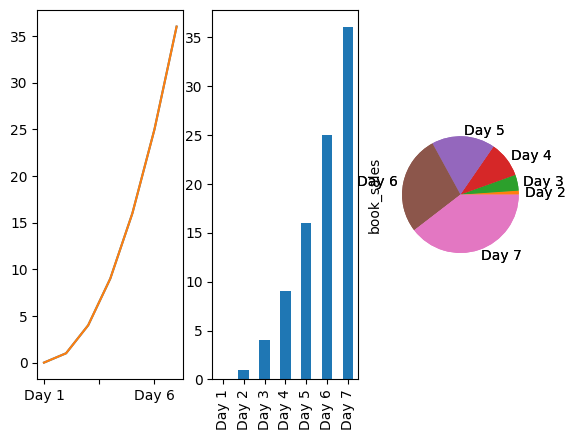

In [ ]:
ser = pd.Series(
    (x ** 2 for x in range(7)),
    name='book_sales',
    index=(f'Day {x+1}' for x in range(7)),
    dtype=pd.Int64Dtype(),
)

fig, axes = plt.subplots(nrows=1, ncols=3)
# ser.plot(ax=axes[0])
# ser.plot(kind='bar', ax=axes[1])
# ser.plot(kind='pie', ax=axes[2])

for kind, ax in zip(['line', 'bar', 'pie'], axes):
    ser.plot(kind=kind, ax=ax)

因为我们没有告诉它任何不同，所以 Matplotlib 为我们提供了三个大小相同的轴对象来绘制。然而，这会使上面的线/条形图变得又高又细，最终导致饼图上方和下方产生大量浪费的空间。

为了更精细地控制这一点，我们可以使用 `Matplotlib.GridSpec` 创建一个 2x2 网格。这样，我们可以将条形图和折线图并排放在第一行，然后我们可以让饼图占据整个第二行：

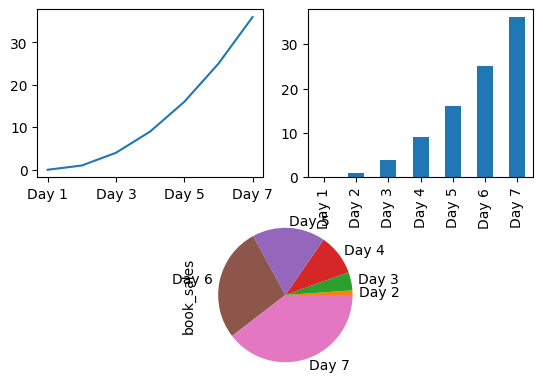

In [6]:
from matplotlib.gridspec import GridSpec

fig = plt.figure()
gs = GridSpec(2, 2, figure=fig)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1, :])

for kind, ax in zip(['line', 'bar', 'pie'], [ax0, ax1, ax2]):
    ser.plot(kind=kind, ax=ax)

Text(0, 0.5, '')

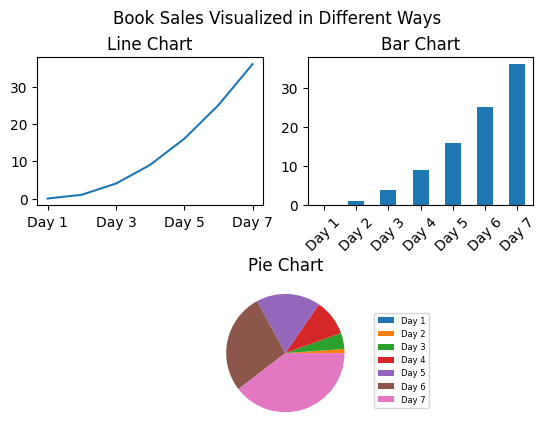

In [17]:
fig = plt.figure()
fig.suptitle("Book Sales Visualized in Different Ways")

gs = GridSpec(2, 2, figure=fig, hspace=.5)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1, :])

ax0 = ser.plot(ax=ax0)
ax0.set_title('Line Chart')

ax1 = ser.plot(kind='bar', ax=ax1)
ax1.set_title('Bar Chart')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

ax2 = ser.plot(kind='pie', ax=ax2, labels=None)
ax2.legend(
    ser.index, bbox_to_anchor=(1, -.2, .5, 1),
    prop={'size': 6}
)
ax2.set_title('Pie Chart')
ax2.set_ylabel(None)